In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from scipy.spatial.distance import cdist
from PIL import Image
from skimage.metrics import structural_similarity as ssim
import PIL
import matplotlib.pyplot as plt
import os
from moviepy.editor import VideoFileClip,concatenate_videoclips
import moviepy.editor as mpy
from moviepy.video.fx.all import crop

In [3]:
!file '/content/drive/MyDrive/NOR - (J2 - 2y1 - D4 B. J2 - 2y1 - D4 B)'

/content/drive/MyDrive/NOR - (J2 - 2y1 - D4 B. J2 - 2y1 - D4 B): ISO Media, Apple QuickTime movie, Apple QuickTime (.MOV/QT)


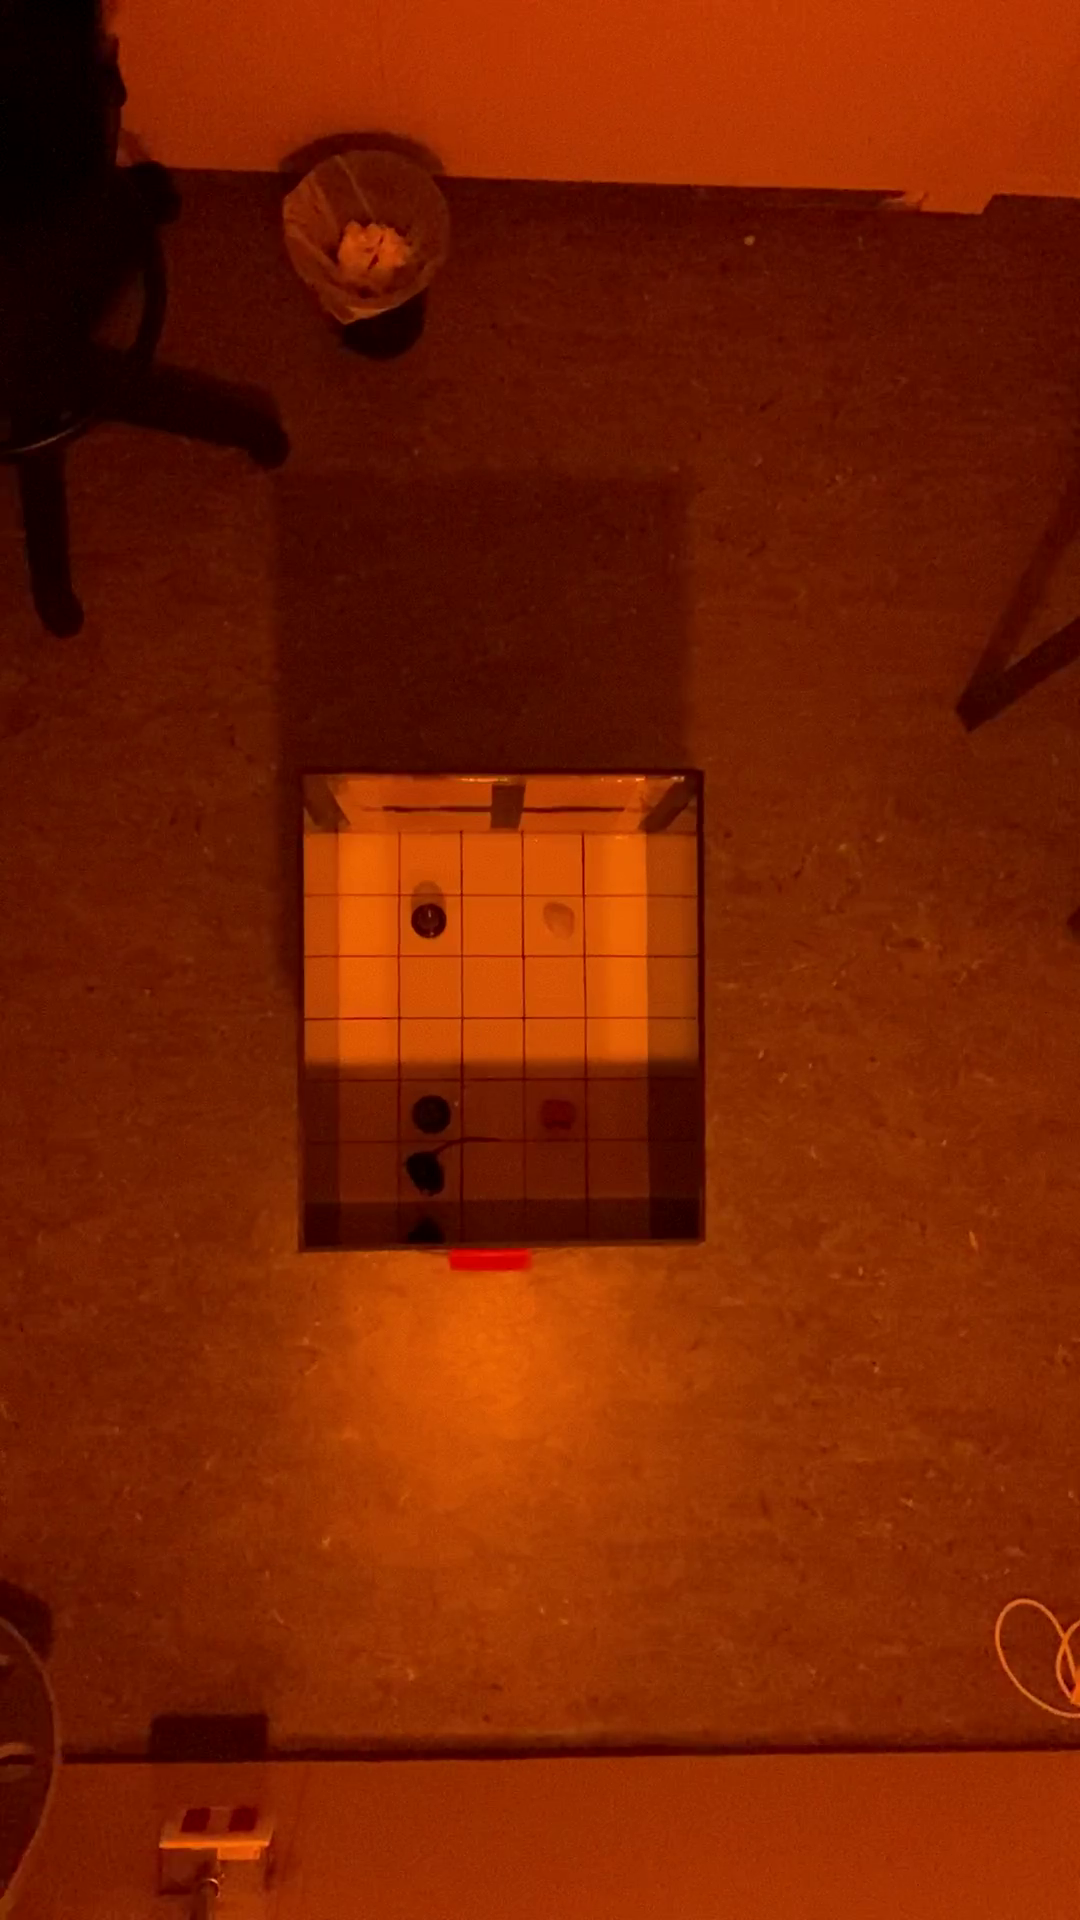

In [4]:
#Read video and extract a frame as example image
video_path = '/content/drive/MyDrive/NOR - (J2 - 2y1 - D4 B. J2 - 2y1 - D4 B)'


def extract_frames_from_video(path):
  vidcap = cv.VideoCapture(path)
  success = True

  while success:
    success, image = vidcap.read()

    if success:
      yield image

frames = extract_frames_from_video(video_path)

for i in range(789):
  img = next(frames)

cv2_imshow(img)

In [5]:
cv.imwrite("cache.jpeg", img)

True

In [6]:
def obtener_subframes(imagen, W1, H1, W2, H2):
    subframes = []
    posiciones = []
    for y in range(0, H1 - H2 + 1):
        for x in range(0, W1 - W2 + 1):
            subframe = imagen[y:y+H2, x:x+W2]
            subframes.append(subframe)
            posiciones.append((x, y))
    return subframes, posiciones

# Ejemplo de uso
import cv2  # Necesitarás tener instalada la librería OpenCV

# Carga de la imagen (reemplaza 'ruta_de_la_imagen' con la ubicación de tu imagen)
imagen = cv2.imread('cache.jpeg')
resized_imagen = cv2.resize(img, (0,0), fx = 0.1, fy = 0.1)
reference = cv2.imread('reference.jpeg')
resized_reference = cv2.resize(reference, (0,0), fx = 0.1, fy = 0.1)

# Dimensiones de la imagen original
alto, ancho, _ = resized_imagen.shape

# Tamaño del subframe deseado (W2, H2)
W2 = resized_reference.shape[1]
H2 = resized_reference.shape[0]

# Obtener subframes
subframes, posiciones = obtener_subframes(resized_imagen, ancho, alto, W2, H2)

# La lista 'subframes' contendrá todos los subframes encontrados
print(f"Se encontraron {len(subframes)} subframes de tamaño {W2}x{H2}.")

Se encontraron 9792 subframes de tamaño 41x49.


100%|██████████| 9792/9792 [00:06<00:00, 1491.95it/s]


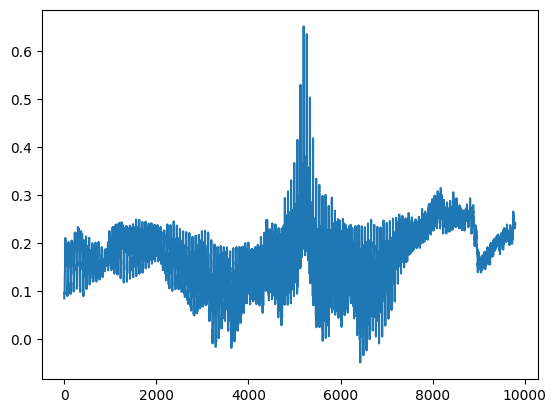

In [7]:
import tqdm

ssim_values = []

for i in tqdm.tqdm(list(range(len(subframes)))):
  ssim_values.append(ssim(cv.cvtColor(subframes[i], cv2.COLOR_BGR2GRAY), cv.cvtColor(resized_reference, cv2.COLOR_BGR2GRAY)))

plt.plot(ssim_values)

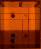

In [8]:
frame_index = np.argmax(ssim_values)
selected_frame = subframes[frame_index]
selected_position = list(posiciones[frame_index])
cv2_imshow(selected_frame)

In [9]:
total_area = imagen.shape[0] * imagen.shape[1]
new_area = reference.shape[0] * reference.shape[1]
reduced = 1-(new_area/total_area)
print(reduced*100)

90.26427469135803


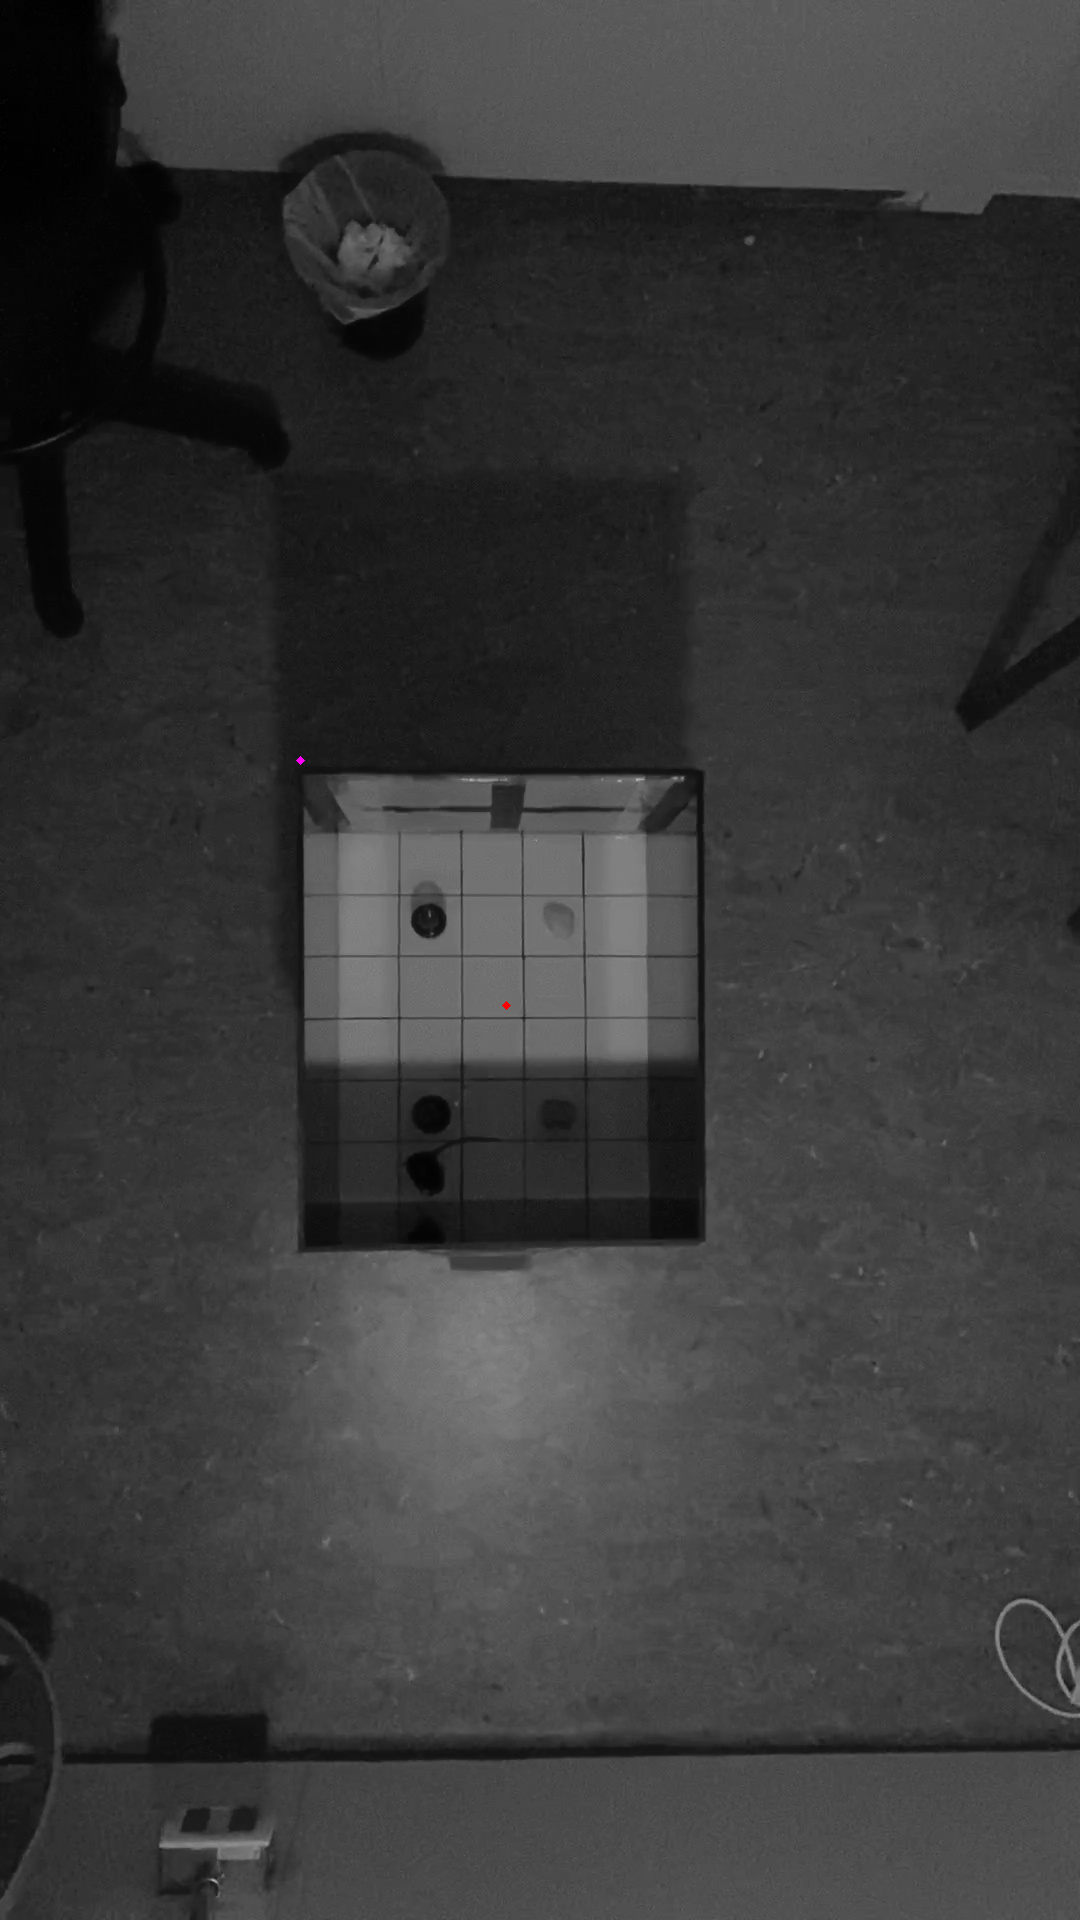

In [10]:
selected_position[0] = int(selected_position[0]/0.1)
selected_position[1] = int(selected_position[1]/0.1)

x_center = int((selected_position[0])+(reference.shape[1]/2))
y_center = int((selected_position[1])+(reference.shape[0]/2))

cimg = cv.cvtColor(cv.imread('cache.jpeg', cv.IMREAD_GRAYSCALE),cv.COLOR_GRAY2BGR)
cv.circle(cimg,[x_center, y_center],2,(0,0,255),3)
cv.circle(cimg,selected_position,2,(255,0,255),3)

cv2_imshow(cimg)

In [ ]:
clip = mpy.VideoFileClip(video_path)
clip = clip.resize((clip.h,clip.w))
cropped_clip = crop(clip, width=reference.shape[1], height=reference.shape[0], x_center=x_center, y_center=y_center)
cropped_clip.write_videofile(video_path+'.crop.mov', codec='libx264', verbose=False)